# MLDM-APP PROJECT - CUSTOMER CHURN PREDICTION

### Group Members 
- Aarushee Thakur : 502204165
- Rimjhim Sharma  : 502204198

## __Problem Identification__

#### Customer churn is a tendency of clients or customers to abandon a brand and stop being a paying client of a particular business or organization. The percentage of customers that discontinue using a company’s services or products during a specific period is called a customer churn rate. Several bad experiences (or just one) are enough, and a customer may quit. And if a large chunk of unsatisfied customers churn at a time interval, both material losses and damage to reputation would be enormous.



## Libraries Used

- Pandas         : Used for exploring, preprocessing, analyzing the dataset
- Numpy          : Used for performing the mathematical operations
- Matplotlib     : Used for visualization
- sklearn        : Provides a selection of efficient tools for machine learning and statistical modeling
- seaborn        : Provides a high-level interface for drawing attractive and informative statistical graphics

In [1]:
#for data preprocceing
import pandas as pd
import numpy as np

In [2]:
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## About the Dataset

### This dataset contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [3]:
data=pd.read_csv("Churn_Modelling.csv")
data.head()                                 #first 5 data rows in dataframe

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.describe()   #stastical information about the data

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Different geographies in the dataset
types = np.unique(np.array(data['Geography']))
types  

array(['France', 'Germany', 'Spain'], dtype=object)

In [8]:
data.isnull().sum()    #To check the presence of null values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
X = data.iloc[:,3:13]   #Independent Variable
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
Y = data.iloc[:,13]   #Dependent variable
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## Data Visualization

### Various graphs have been plotted to visually illustrate the relationships found in the data.

## Graphs Plotted

- Horizontal Bar Graph         : Used to display the customers who left the business
- Pie Chart                    : Used to display the gender ratio of account holders
- Bar Graph                    : Used to display the number of customers from various countries
- Bar Graph                    : Used to display the number of customers who exited from various countries
- Bar Graph                    : Used to display the variation in age groups of customers

Text(0.5, 1.0, 'Number of customers who left the business')

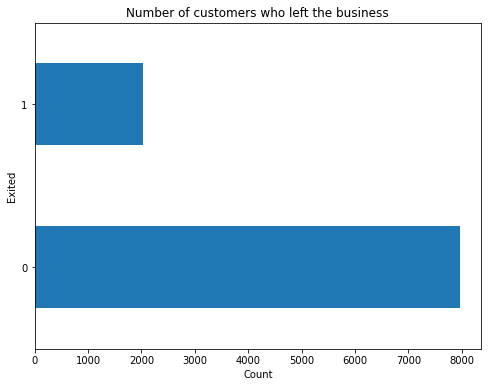

In [11]:
data['Exited'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("Count")

plt.ylabel("Exited")

plt.title("Number of customers who left the business")

Text(0.5, 1.0, 'Gender proportion')

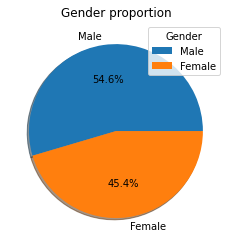

In [12]:
labels_data=['Male','Female']
plt.pie(data['Gender'].value_counts(),labels=labels_data,shadow = True,autopct='%1.1f%%')
plt.legend(title = "Gender")
plt.title("Gender proportion")

Text(0.5, 1.0, 'Number of customers in each country')

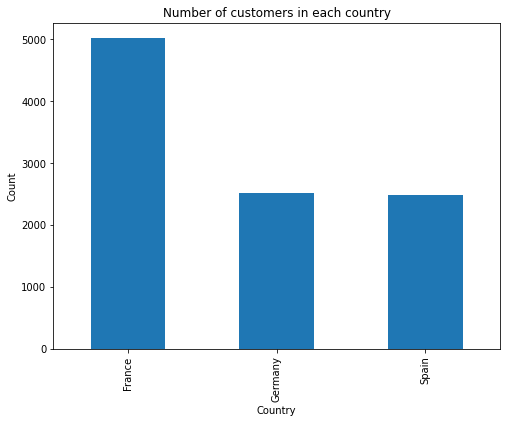

In [13]:
data['Geography'].value_counts().plot(kind='bar',figsize=(8,6))
plt.xlabel("Country")

plt.ylabel("Count")

plt.title("Number of customers in each country")

Text(0.5, 1.0, 'Number of exit customers based on geography')

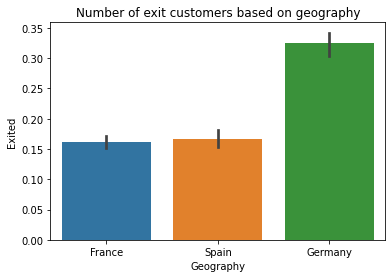

In [14]:
sns.barplot(x='Geography', y='Exited', data=data)
plt.title("Number of exit customers based on geography")

Text(0.5, 1.0, 'Age group of customers')

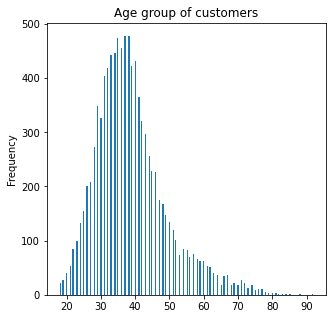

In [15]:
data.Age.plot(kind = 'hist', bins = 200, figsize = (5,5))
plt.title("Age group of customers")

## Categorical Data Handeling

### Categorical data is converted into numerical data to prepare the data for modelling and therefore creating more features in the dataset. 
### The columns Geography and Gender are categorical data therefore needed to be converted into numerical form. The conversion was made by using pandas library (pd.get_dummies) to create more columns.

In [16]:
X=pd.get_dummies(X, drop_first=True)   #Categorical Data Handeling
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


## The dataset has been split into 25% testing set and 75% training test

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

## Proposed Models

## Using Classification Models that are a type of supervised learning has been used on the dataset.
- Logistic Regression : Predicts the output in the probability range of [0,1]
- KNN : Assumes the similarity between the new data and available data and put the new data into the category that is most similar to the available categories.
- Naive Bayes : Probability-based machine learning classification algorithm which means it predicts on the basis of the probability of an object.
- Decision Tree : Decisions are performed based on the features of the dataset.

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
LRC=LogisticRegression()
LRC.fit(X_train,Y_train)

LogisticRegression()

In [20]:
Y_pred=LRC.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[1901   90]
 [ 393  116]]


<AxesSubplot:>

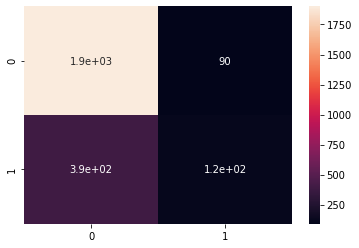

In [22]:
sns.heatmap(cm, annot=True)

<AxesSubplot:>

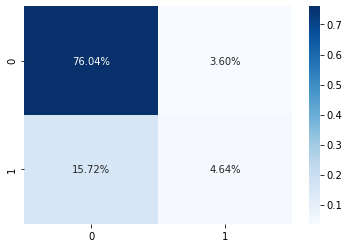

In [23]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [24]:
from sklearn.metrics import accuracy_score
acc_1=accuracy_score(Y_test,Y_pred)*100
print("The accuracy with Logistic Regression Model is", acc_1)

The accuracy with Logistic Regression Model is 80.67999999999999


## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn=KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [27]:
Y_pred_knn=knn.predict(X_test)
Y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
cm_knn=confusion_matrix(Y_test,Y_pred_knn)
print(cm_knn)

[[1861  130]
 [ 298  211]]


<AxesSubplot:>

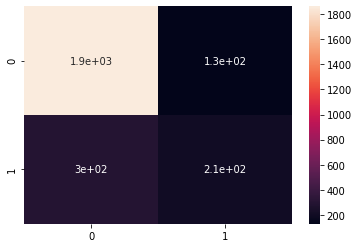

In [29]:
sns.heatmap(cm_knn, annot=True)

<AxesSubplot:>

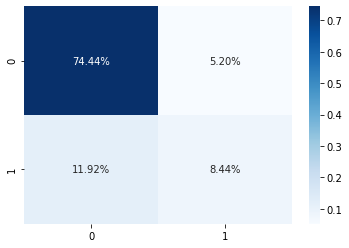

In [30]:
sns.heatmap(cm_knn/np.sum(cm_knn), annot=True, 
            fmt='.2%', cmap='Blues')

In [31]:
acc_score_k=accuracy_score(Y_test,Y_pred_knn)*100
print("The accuracy with KNN Model is", acc_score_k)

The accuracy with KNN Model is 82.88


## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
DTC=DecisionTreeClassifier(criterion='entropy')
DTC.fit(X_train,Y_train) 

DecisionTreeClassifier(criterion='entropy')

In [34]:
Y_pred1=DTC.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(Y_test,Y_pred1)
print(cm1)

[[1731  260]
 [ 233  276]]


<AxesSubplot:>

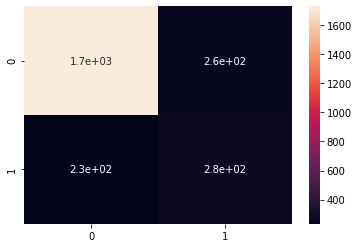

In [36]:
sns.heatmap(cm1, annot=True)

<AxesSubplot:>

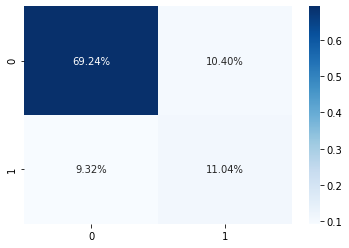

In [37]:
sns.heatmap(cm1/np.sum(cm1), annot=True, 
            fmt='.2%', cmap='Blues')

In [38]:
acc_dt=accuracy_score(Y_test,Y_pred1)*100
print("The accuracy with Decision Tree Model is", acc_dt)

The accuracy with Decision Tree Model is 80.28


## Naive Bayes Classifier

In [39]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [40]:
# Prediction
Y_pred_nb=nb.predict(X_test)

In [41]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(Y_test, Y_pred_nb)
print(cm_nb)

[[1861  130]
 [ 316  193]]


<AxesSubplot:>

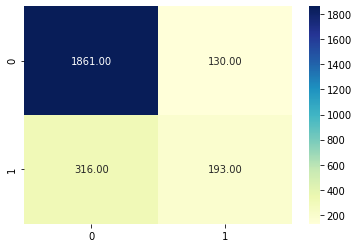

In [42]:
sns.heatmap(cm_nb, annot=True, fmt='.2f', cmap="YlGnBu")

In [43]:
# accuracy
from sklearn.metrics import accuracy_score
acc_nb=accuracy_score(Y_test, Y_pred_nb)*100
print("The accuracy with Naive Bayes Model is", acc_nb)

The accuracy with Naive Bayes Model is 82.16


In [44]:
Results = pd.DataFrame({'Model':["Logistic Regression","KNN","Decision Tree","Naive Bayes"],\
                        'accuracy_percentage':[acc_1,acc_score_k,acc_dt,acc_nb]})


In [45]:
print(Results)

            name_model  accuracy_percentage
0  Logistic Regression                80.68
1                  KNN                82.88
2        Decision Tree                80.28
3          Naive Bayes                82.16
